In [1]:
import os
import copy
import mne
import mne.viz
import numpy as np
import pandas as pd
import pyxdf
import matplotlib.pyplot as plt

from data_processing import organize_xdf

trigger_map = {
    "instructed_left": [5, 51],
    "instructed_right": [3, 31]
}

data, labels = organize_xdf("data.xdf", 1, instructed_trigger_map=trigger_map)#, gelled_indeces=list(range(0,32)))
# data, labels = organize_xdf("data.xdf", 1, instructed_trigger_map=trigger_map, gelled_indeces=list(range(32,64)))


Creating RawArray with float64 data, n_channels=68, n_times=813534
    Range : 0 ... 813533 =      0.000 ...  1627.066 secs
Ready.
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
1254 events found
Event IDs: [  1   3   4   5   6  10  16  27  28  31  32  41  51  61 100]
Not setting metadata
Not setting metadata
125 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 125 events and 501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
125 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 125 events and 501 original time points ...
0 bad epochs dropped
/home/adrien/BIpy/data_processing.py:43: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around 

In [2]:
from mne.decoding import CSP

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(data)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=10, reg=None, log=True, norm_trace=False, component_order='alternate')

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])
scores = cross_val_score(clf, data, labels, cv=cv, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance))


Computing rank from data with rank=None
    Using tolerance 4e+06 (2.2e-16 eps * 35 dim * 5.2e+20  max singular value)
    Estimated rank (mag): 35
    MAG: rank 35 computed from 35 data channels with 0 projectors
Reducing data rank from 35 -> 35
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4e+06 (2.2e-16 eps * 35 dim * 5.1e+20  max singular value)
    Estimated rank (mag): 35
    MAG: rank 35 computed from 35 data channels with 0 projectors
Reducing data rank from 35 -> 35
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.1e+06 (2.2e-16 eps * 35 dim * 5.3e+20  max singular value)
    Estimated rank (mag): 35
    MAG: rank 35 computed from 35 data channels with 0 projectors
Reducing data rank from 35 -> 35
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.9e+06 (2.2e-16 eps * 35 dim * 5e+20  max singular value)
    Es

In [3]:
res = clf.fit_transform(data, labels).reshape((250,))

Computing rank from data with rank=None
    Using tolerance 4.5e+06 (2.2e-16 eps * 35 dim * 5.8e+20  max singular value)
    Estimated rank (mag): 35
    MAG: rank 35 computed from 35 data channels with 0 projectors
Reducing data rank from 35 -> 35
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.5e+06 (2.2e-16 eps * 35 dim * 5.8e+20  max singular value)
    Estimated rank (mag): 35
    MAG: rank 35 computed from 35 data channels with 0 projectors
Reducing data rank from 35 -> 35
Estimating covariance using EMPIRICAL
Done.


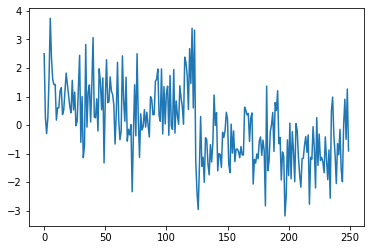

In [4]:
plt.plot(res)

In [5]:
labels

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])